In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense # type: ignore
# Dense adalah nama lain dari hidden layer kalau di keras

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [3]:
plt.style.use('seaborn-v0_8')

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
df = pd.read_csv('./pima_diabetes.csv')
df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


## Load Datasets

In [6]:
df_diabetes = pd.read_csv('./pima_diabetes.csv', names=['preg_times', 'glucose', 'blood_press', 'skin_thickness', 'insulin', 'BMI', 'pedigree', 'age', 'class'])
df_diabetes.head()

,preg_times,glucose,blood_press,skin_thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# Cek ukuran data

print('Total data:', df_diabetes.shape[0])
print('Total features:', df_diabetes.shape[1])

Total data: 768
Total features: 9


<Axes: xlabel='age', ylabel='Density'>

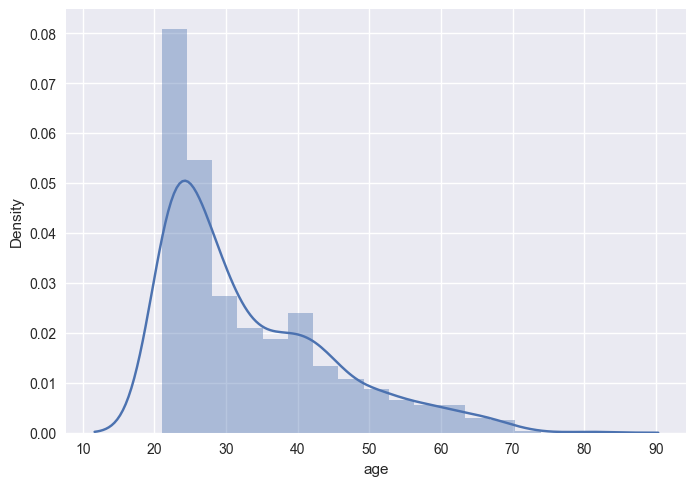

In [8]:
sns.distplot(df_diabetes['age'])

In [9]:
df_diabetes.describe()

,preg_times,glucose,blood_press,skin_thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Split Datasets

In [10]:
features = df_diabetes.values[:,:8]
features

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [11]:
labels = df_diabetes.values[:,8:]
labels

array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=20)

## Define Model

In [13]:
# define the keras sequential model
model = Sequential()

In [14]:
# Artificial Neural Network / Multi-layer Perceptron / Fully Connected Neural Network

# Convolutional Neural Network -> data gambar

# Long-Short Term Memory Neural Network -> data squentian atau data teks

# Dll...


In [15]:
# lihat di neural network 

model.add(Dense(12, input_dim=8, activation='relu')) # input layer + 1st hidden layer
model.add(Dense(8, activation='relu')) # 2nd hidden layer
model.add(Dense(1, activation='sigmoid')) # output layer

**Question:** Arsitektur di atas termasuk MLP atau perceptron?

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

## Compile Model

In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

optmizer **Adam**


## Train Model

In [18]:
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=250, batch_size=8)

Epoch 1/250
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5103 - loss: 3.0601  
Epoch 2/250
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.6349 - loss: 0.9364
Epoch 3/250
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - accuracy: 0.6811 - loss: 0.8051
Epoch 4/250
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.6478 - loss: 0.7864
Epoch 5/250
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - accuracy: 0.6369 - loss: 0.8561
Epoch 6/250
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - accuracy: 0.6553 - loss: 0.7652
Epoch 7/250
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - accuracy: 0.6693 - loss: 0.8125
Epoch 8/250
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - accuracy: 0.6521 - loss: 0.7938
Epoch 9/250
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - accuracy: 0.7114 - loss: 0.6917
Epoch 10/250
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - accuracy: 0.6749 - loss: 0.6859
Epoch 11/250
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.6675 - loss: 0.6834
Epoch 12/250
77/77 ━━━━━━━━━━━━━━━━━━━━ 0

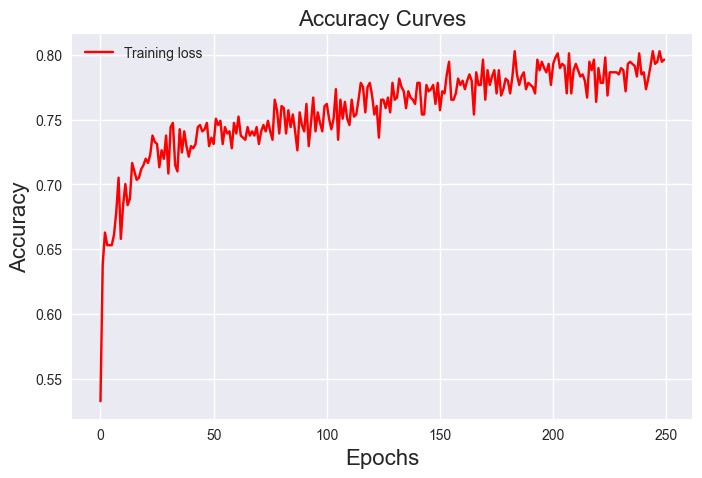

In [19]:
plt.figure(figsize=[8,5])
plt.plot(model.history.history['accuracy'], 'r')  # history.history digunakan untuk mengakses hasil training
plt.legend(['Training loss'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

## Evaluate Model

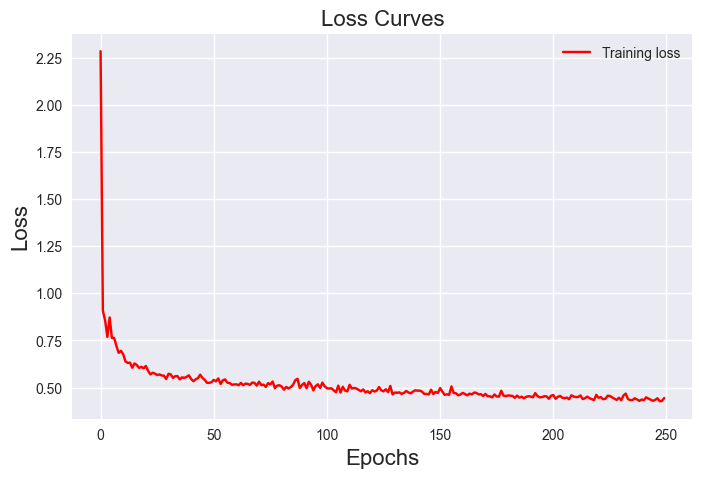

In [20]:
plt.figure(figsize=[8,5])
plt.plot(model.history.history['loss'], 'r')  # history.history digunakan untuk mengakses hasil training
plt.legend(['Training loss'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves', fontsize=16)

plt.show()

In [21]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test, verbose=False)
print(f'Accuracy: {accuracy*100:.2f}')

Accuracy: 70.78


---